## Image Representation

- A digital image is composed of M rows and N columns of pixels each storing a value.
- Pixel values are most often grey levels in the range 0-255(black-white).

#### Image Acquisition:

Images are typically generated by illuminating a scene and absorbing the energy reflected by the objects in that scene
Typical notions of illumination and scene can be way off:
- X-rays of a skeleton
- Ultrasound of an unborn baby
- Electro-microscopic images of molecules


### Image sensing:
Image sensing is the process of reading image data from the environment through sensors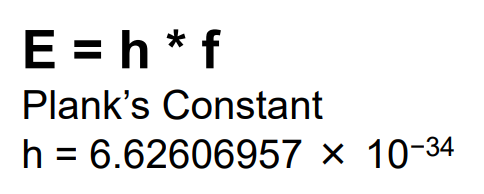

#### Bit depth:
It is the no. of bits required to store one pixel of an image
Grayscale image takes size on disk:  <br />
= M * N * 8bit  <br />
= M * N bytes

## Image Sampling And Quantization

A digital sensor can only measure a limited number of samples at a discrete set of energy levels Sampling & Quantization are the processes of converting a continuous analogue signal into a digital representation of this signal

- Sampling is Discretization of spatial coordinates.
- Quantization of amplitude values.

### Spatial Resolution:

- It is the no. of samples gathered to reresent an image.
- It also represents the smallest discretable(distinguishable) details in the image <br >
= 1000 * 1000 <br >
= 1 Mega <br >
= 10^6

### Intensity Level Resolution

- Refers to the no. of intensities(shades) used to represent an image.
- It also refer the finest discernable(distinguishable) detail in the image

#### (Notice False Contouring)

### Basic Image concepts:

#### Image size: 
<b> size = M * N * b * # of channels </b><br>
M * N --> Spatial resolution <br>
b     --> bit depth <br>
no. of channels --> Grayscale:1, RGB:3

## Brightness:
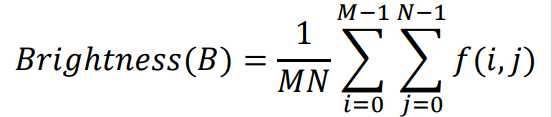

In [1]:
# ! pip install opencv-python

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [27]:
img = cv.imread('resources/1.jpg')

In [28]:
img

array([[[104,  90, 102],
        [104,  90, 102],
        [103,  89, 101],
        ...,
        [103,  95, 106],
        [103,  95, 106],
        [103,  95, 106]],

       [[103,  89, 101],
        [104,  90, 102],
        [104,  90, 102],
        ...,
        [100,  92, 103],
        [ 99,  91, 102],
        [104,  96, 107]],

       [[103,  89, 101],
        [105,  91, 103],
        [105,  91, 103],
        ...,
        [100,  92, 103],
        [ 98,  90, 101],
        [101,  93, 104]],

       ...,

       [[139, 137, 166],
        [139, 137, 167],
        [139, 137, 167],
        ...,
        [122, 124, 155],
        [122, 124, 155],
        [122, 124, 155]],

       [[138, 136, 165],
        [134, 132, 161],
        [134, 132, 162],
        ...,
        [120, 122, 153],
        [121, 123, 154],
        [124, 126, 157]],

       [[135, 133, 162],
        [130, 128, 157],
        [134, 132, 162],
        ...,
        [123, 125, 156],
        [123, 125, 156],
        [122, 124, 155]]

In [29]:
img.shape

(6720, 4480, 3)

In [30]:
M = img.shape[0]*0.1
N = img.shape[1]*0.1

In [31]:
M, N

(672.0, 448.0)

In [32]:
img1 = cv.resize(img, (int(N), int(M)))

In [33]:
cv.imshow("Original-resized", img1)
cv.waitKey(10000)
cv.destroyAllWindows()

In [34]:
# cv.imshow("Original-resized", img1[:, :, 0])
# cv.waitKey(5000)

# cv.imshow("Original-resized", img1[:, :, 1])
# cv.waitKey(5000)

# cv.imshow("Original-resized", img1[:, :, 2])
# cv.waitKey(5000)
# cv.destroyAllWindows()

In [35]:
gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image', gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
gray_img1.shape

(672, 448)

### Brightness Calculation of gray scale image

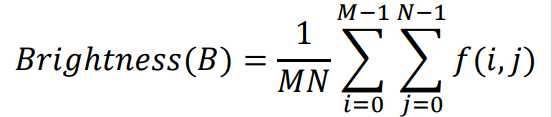

In [37]:
# sum_rows_values = np.sum(gray_img1, axis=1)
# sum_all_values = np.sum(sum_rows_values)
# sum_all_values/(M*N)

In [38]:
B = (1/(M*N)) * np.sum(np.sum(gray_img1, axis=1))
B

116.38121146896258

In [39]:
# arr = np.arange(1, 11)
# arr = np.reshape(arr, (2, 5))
# print(arr)
# np.sum(arr, axis=1)

## Contrast
<b>Def 1:</b>
The total difference between the highest and lowest intensity of an image. <br >
<b>Def 2:</b>
It is the avg(sqr root) difference from the avg intensity.

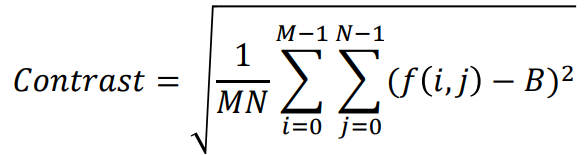

### Contrast Calculation of gray scale image from def 1

In [40]:
C_1 = np.max(gray_img1) - np.min(gray_img1)
C_1

246

In [41]:
B

116.38121146896258

### Contrast Calculation of gray scale image from def 2

In [42]:
C_2 = np.sqrt((1/(M*N)) * np.sum((np.sum(np.square(gray_img1 - B), axis=1))))
C_2

58.35704119609985

In [43]:
np.sqrt(np.sum(np.square(gray_img1 - B))/ (M*N))

58.35704119609985

In [44]:
cv.imshow('Gray Image', gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

### Histogram

In [45]:
gray_img1_flatten = gray_img1.flatten()

In [46]:
gray_img1_flatten

array([ 94, 100, 105, ..., 137, 133, 134], dtype=uint8)

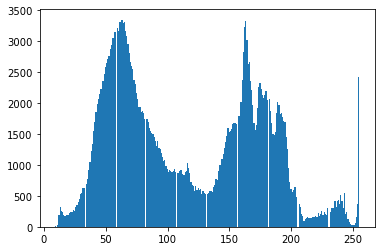

In [47]:
plt.hist(x = gray_img1_flatten, bins=256)
plt.show()

### Entropy

Entropy is a measure of the amount of disorder in an image
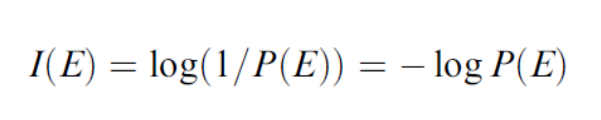

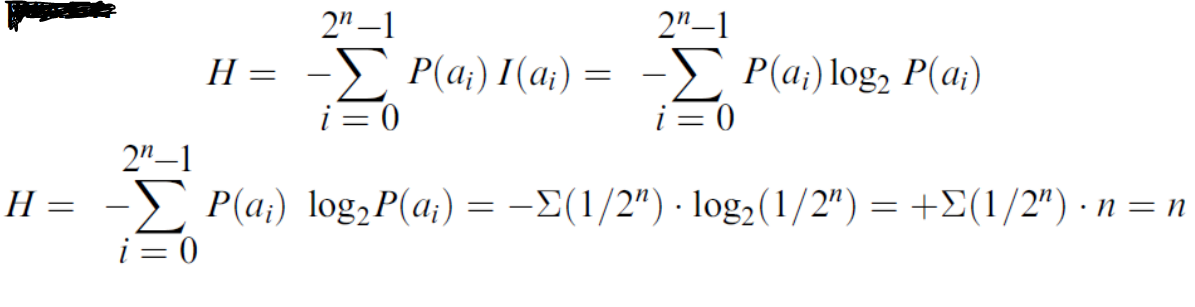

In [48]:
# I(ai) = -log2(P(ai))
gray_img1.shape

(672, 448)

In [56]:
p = np.array([gray_img1[gray_img1 == x].size for x in range(256)])
p

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    5,    3,
         32,  183,  315,  254,  246,  185,  182,  190,  188,  192,  227,
        233,  233,  265,  263,  318,  346,  400,  447,  525,  539,  628,
        620,  695,  772,  922, 1044, 1219, 1343, 1542, 1701, 1861, 1993,
       2065, 2153, 2229, 2223, 2351, 2464, 2586, 2652, 2708, 2759, 2875,
       2934, 3060, 3054, 3155, 3212, 3170, 3305, 3321, 3350, 3291, 3306,
       3166, 3093, 2950, 2815, 2662, 2596, 2545, 2368, 2313, 2158, 2066,
       1946, 1937, 1864, 1867, 1836, 1741, 1750, 1693, 1596, 1547, 1522,
       1508, 1456, 1390, 1312, 1380, 1270, 1259, 1193, 1131, 1070, 1076,
        990,  942,  888,  920,  899,  887,  910,  940,  882,  877,  901,
        911,  921,  847,  841,  882,  901, 1028,  956,  864,  719,  670,
        659,  585,  655,  601,  626,  591,  604,  537,  577,  554,  534,
        532,  541,  582,  574,  569,  638,  680,  778,  760,  900,  992,
        994, 1092, 1175, 1278, 1377, 1476, 1597, 15

In [57]:
p.sum()

301056

In [58]:
p = p/p.sum()

In [59]:
p.sum()

1.0

In [53]:
H = -(p * np.log2(p)).sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3456\954682695.py:1: RuntimeWarning: divide by zero encountered in log2
  H = -(p * np.log2(p)).sum()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3456\954682695.py:1: RuntimeWarning: invalid value encountered in multiply
  H = -(p * np.log2(p)).sum()


In [60]:
H = -(p[p>0] * np.log2(p[p>0])).sum()

In [61]:
H

7.507862365501513

### Noise:

Noise is an unwanted signal that exists in electronic systems

### Saturation

A type of distortion when the light difference in intensities are clipped to a maximum values

## Single image operations:
 - Addition/ Subtraction/ Multiplication/ Division (Array based operation)
 - Set operation on image
 - Boolean operation on image

In [27]:
# mask = [
#     [i] * int(N) for i in range(int(M))
# ]

In [28]:
# mask1 = np.zeros((int(M),int(N)))

In [29]:
# mask1[80:200, 180:290] = 100
# mask = mask + mask1

In [30]:
# np.max(mask)

In [31]:
# mask = np.array([i for i in range(int(N))])

In [139]:
x = np.random.randint(255,size=(int(M), int(N)))

In [141]:
x.shape

(672, 448)

In [135]:
gray_img1

array([[ 94, 100, 105, ..., 102, 100, 101],
       [ 97,  96,  99, ..., 108, 104, 103],
       [106, 101,  98, ..., 108, 106, 102],
       ...,
       [144, 144, 148, ..., 139, 138, 138],
       [146, 144, 147, ..., 137, 136, 131],
       [145, 143, 147, ..., 137, 133, 134]], dtype=uint8)

In [154]:
new_img = [255] - gray_img1

In [155]:
new_img

array([[161, 155, 150, ..., 153, 155, 154],
       [158, 159, 156, ..., 147, 151, 152],
       [149, 154, 157, ..., 147, 149, 153],
       ...,
       [111, 111, 107, ..., 116, 117, 117],
       [109, 111, 108, ..., 118, 119, 124],
       [110, 112, 108, ..., 118, 122, 121]])

In [156]:
np.amin(new_img)

0

### Normalization

In [157]:
new_img = (       ((new_img - np.min(new_img)) / np.amax(new_img))           * 255).astype('uint8')

In [158]:
new_img

array([[166, 160, 155, ..., 158, 160, 159],
       [163, 164, 161, ..., 152, 156, 157],
       [154, 159, 162, ..., 152, 154, 158],
       ...,
       [115, 115, 110, ..., 120, 121, 121],
       [112, 115, 111, ..., 122, 123, 128],
       [114, 116, 111, ..., 122, 126, 125]], dtype=uint8)

In [159]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('nom Image', new_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Flipping

In [37]:
gray_img1

array([[ 94, 100, 105, ..., 102, 100, 101],
       [ 97,  96,  99, ..., 108, 104, 103],
       [106, 101,  98, ..., 108, 106, 102],
       ...,
       [144, 144, 148, ..., 139, 138, 138],
       [146, 144, 147, ..., 137, 136, 131],
       [145, 143, 147, ..., 137, 133, 134]], dtype=uint8)

In [38]:
flipped = np.flip(gray_img1, axis=1)

In [39]:
transposed = np.transpose(gray_img1)

In [40]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('Flipped Image', flipped)
cv.imshow('Transposed Image', transposed)
cv.waitKey(0)
cv.destroyAllWindows()